In [40]:
import pandas as pd
import numpy as np
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
%matplotlib inline

In [3]:
server='tuhrin\SQLEXPRESS'
db='AdventureWorks2012'

conn=pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+db+';Trusted_Connection=yes')

sql="""

select * from Sales.vPersonDemographics

"""

demographics=pd.read_sql(sql,conn)
demographics.head()

,BusinessEntityID,TotalPurchaseYTD,DateFirstPurchase,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned
0,1,0.0,None,None,None,None,None,NaN,NaN,None,None,None,NaN
1,2,0.0,None,None,None,None,None,NaN,NaN,None,None,None,NaN
2,3,0.0,None,None,None,None,None,NaN,NaN,None,None,None,NaN
3,4,0.0,None,None,None,None,None,NaN,NaN,None,None,None,NaN
4,5,0.0,None,None,None,None,None,NaN,NaN,None,None,None,NaN


In [5]:
demographics.shape

(19972, 13)

In [8]:
demographics.isnull().sum()

BusinessEntityID           0
TotalPurchaseYTD           0
DateFirstPurchase       1488
BirthDate               1488
MaritalStatus           1488
YearlyIncome            1488
Gender                  1488
TotalChildren           1488
NumberChildrenAtHome    1488
Education               1488
Occupation              1488
HomeOwnerFlag           1488
NumberCarsOwned         1488
dtype: int64

In [12]:
demographics=demographics.dropna()

In [19]:
demographics.head()

,BusinessEntityID,TotalPurchaseYTD,DateFirstPurchase,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwnerFlag,NumberCarsOwned
994,1699,33.98,2003-09-01 00:00:00,1961-02-23 00:00:00,M,25001-50000,M,4.0,0.0,Graduate Degree,Clerical,True,0.0
995,1700,32.27,2004-06-05 00:00:00,1965-06-11 00:00:00,M,50001-75000,F,3.0,3.0,Bachelors,Professional,True,1.0
996,1701,8164.01,2002-04-07 00:00:00,1954-09-23 00:00:00,S,75001-100000,M,2.0,0.0,Partial College,Skilled Manual,False,2.0
997,1702,3142.45,2001-10-27 00:00:00,1943-07-15 00:00:00,M,25001-50000,M,1.0,0.0,Bachelors,Clerical,True,0.0
998,1703,5279.26,2002-04-18 00:00:00,1968-05-15 00:00:00,M,50001-75000,M,2.0,2.0,Bachelors,Professional,True,1.0


In [38]:
a=pd.to_datetime(demographics.BirthDate).dt.year
a_mean=np.mean(a)
a_std=np.std(a)

In [52]:
a=a.sort_values()

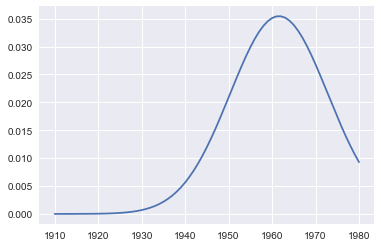

In [53]:
#plot the normal curve
normal_distribution_curve = stats.norm.pdf(a, a_mean, a_std)
plt.plot(a, normal_distribution_curve)

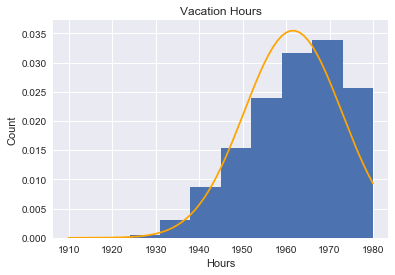

In [54]:
#plot the normal curve with the histogram
plt.hist(a, normed = True) # plotting histogram
plt.plot(a, normal_distribution_curve, color = "orange") #plotting normal curve
plt.title("Vacation Hours") #Assign title
plt.xlabel("Hours") #Assign x label
plt.ylabel("Count") #Assign y label
plt.show()

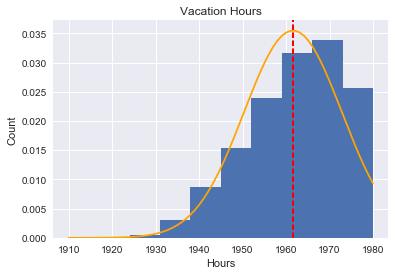

In [57]:
#plot the normal curve with histogram and vertical line
plt.hist(a, normed = True) # plotting histogram
plt.plot(a, normal_distribution_curve, color = "orange") #plotting normal curve
plt.title("Vacation Hours") #Assign title
plt.xlabel("Hours") #Assign x label
plt.ylabel("Count") #Assign y label
plt.axvline(a_mean, color = "r", linestyle = "dashed", linewidth = 2)
plt.show()

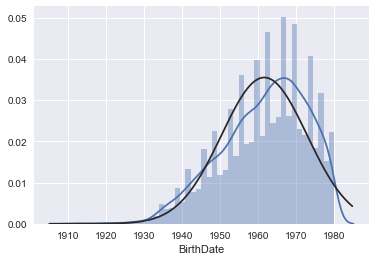

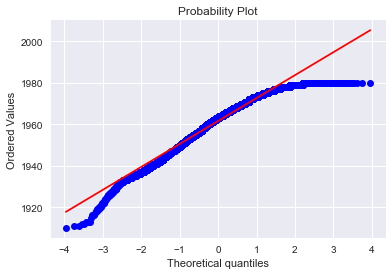

In [76]:
#histogram and normal probability plot
sns.distplot(a, fit=norm);
plt.figure()
stats.probplot(a, plot=plt);

In [77]:
cdf=stats.norm.cdf(a, a_mean, a_std)

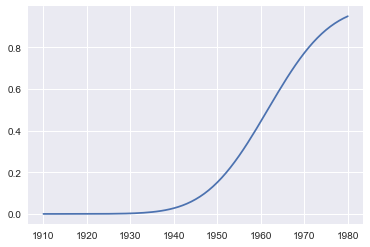

In [78]:
plt.plot(a, cdf)